<a href="https://colab.research.google.com/github/Ravikiit/Quantative_Analysis/blob/main/PART7_5_Monte_Carlo_Forecasting_Stock_Prices_Part_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [3]:
data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


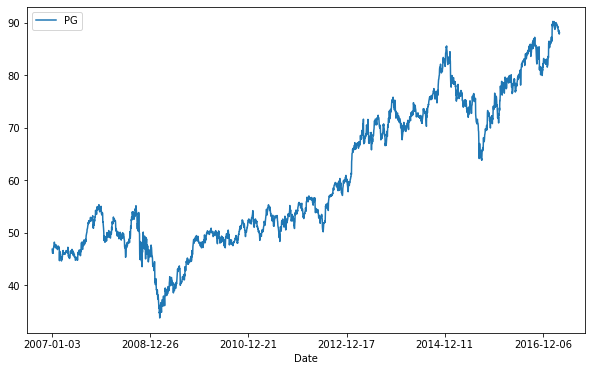

In [5]:
data.plot(figsize=(10, 6));

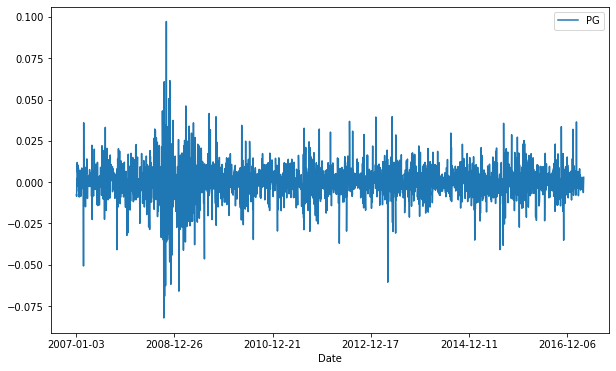

In [6]:
log_returns.plot(figsize = (10, 6))

In [7]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [8]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [9]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [10]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

In [11]:
type(drift)

pandas.core.series.Series

In [12]:
type(stdev)

pandas.core.series.Series

In [13]:
np.array(drift)

array([0.00018236])

In [14]:
drift.values

array([0.00018236])

In [15]:
stdev.values

array([0.0111381])

In [16]:
norm.ppf(0.95)

1.6448536269514722

In [17]:
x = np.random.rand(10, 2)
x

array([[0.17875255, 0.42496465],
       [0.25163231, 0.37153989],
       [0.47158997, 0.20257949],
       [0.67851716, 0.19810863],
       [0.67259275, 0.87203703],
       [0.14089973, 0.91834507],
       [0.45628379, 0.91277947],
       [0.19620999, 0.31973453],
       [0.73103756, 0.5267581 ],
       [0.97582404, 0.80328913]])

In [18]:
norm.ppf(x)

array([[-0.92012947, -0.18920864],
       [-0.66936196, -0.32777765],
       [-0.07127368, -0.83244292],
       [ 0.4635563 , -0.84839639],
       [ 0.44708388,  1.13607318],
       [-1.07628581,  1.39402567],
       [-0.10980052,  1.3580713 ],
       [-0.85523694, -0.46844127],
       [ 0.61595401,  0.06712298],
       [ 1.97426239,  0.85342848]])

In [19]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-1.66783063, -0.67820034],
       [ 2.25655111,  0.22172202],
       [ 0.36273462, -0.8933444 ],
       [-0.92433708, -0.40435916],
       [ 0.97331066,  0.25596066],
       [ 0.25694819,  2.22924173],
       [-0.30218039,  0.81729772],
       [-1.22882851,  0.77902836],
       [-2.96516961, -0.4058696 ],
       [ 0.04388545,  0.68606609]])

In [20]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [21]:
daily_returns

array([[1.02179659, 1.00922148, 0.9934338 , ..., 0.99004114, 1.0097249 ,
        0.99620653],
       [0.99920325, 0.98297687, 1.00440926, ..., 1.01370986, 1.01274513,
        0.97850155],
       [1.00375488, 1.01226748, 1.0136074 , ..., 1.00879422, 0.9949077 ,
        1.00121649],
       ...,
       [0.99684853, 0.99954103, 1.00605902, ..., 1.00622744, 1.01318793,
        0.9948638 ],
       [0.99094179, 0.99510099, 0.99926011, ..., 1.00185585, 1.00777223,
        0.98885788],
       [1.01798769, 1.00111786, 1.00166603, ..., 1.00321624, 0.97084783,
        0.99957959]])

In [22]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 2017-04-10, dtype: float64

In [23]:
price_list = np.zeros_like(daily_returns)

In [24]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [26]:
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [27]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [28]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.04842019,  86.61857421,  88.50716672, ...,  89.32672279,
         89.24171281,  86.22421527],
       [ 88.37903148,  87.68116542,  89.71151928, ...,  90.11228153,
         88.7872671 ,  86.32910588],
       ...,
       [ 91.64041293,  78.93846069,  80.28932176, ..., 149.37713751,
        107.33050888, 149.67502974],
       [ 90.81031471,  78.55174032,  80.2299168 , ..., 149.65435979,
        108.16470677, 148.00733212],
       [ 92.44378261,  78.63955043,  80.36358202, ..., 150.13568387,
        105.01147138, 147.94510834]])

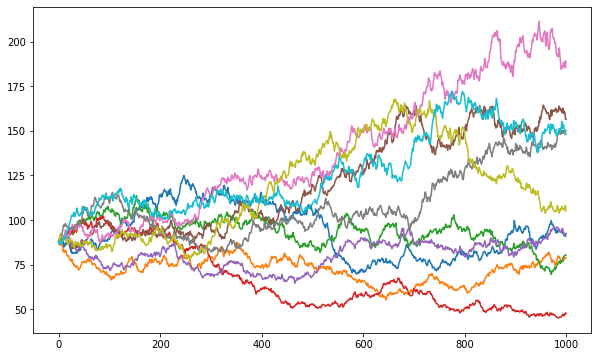

In [29]:
plt.figure(figsize=(10,6))
plt.plot(price_list);